In [1]:
import numpy as np
import pandas as pd
import modules

df_s = modules.load_data("../data/schuelerinnen.csv")
df_l = modules.load_data("../data/lehrerinnen.csv")
df_s["Grade_Topic"] = df_s["Grade"].astype(str) + "_" + df_s["Topic"].astype(str)
df_l["Grade_Topic"] = df_l["Grade"].astype(str) + "_" + df_l["Topic"].astype(str)

df_j = modules.join_datasets(df_s, df_l, on="Grade_Topic", how="outer")

print(df_j.columns)

Index(['Grade_x', 'Topic_x', 'How interesting did you find the topic?',
       'Did you have any prior knowledge?',
       'How important do you consider this topic to be?',
       'How difficult did you find the materials?',
       'What did you think of the time frame?',
       'How would you rate the teacher's delivery?',
       'How much did you learn during the lesson?',
       'Do you feel better prepared for such situations now?',
       'Do you plan to tell your family or friends about what you learned?',
       'Did you find this lesson better than typical substitute lessons?',
       'Grade_Topic', 'Grade_y', 'Topic_y',
       'How practical/easy to use was the provided material?',
       'How appropriate was the time frame?',
       'Did the material motivate the students?',
       'Do you feel better prepared for such situations than before?',
       'Would you conduct this lesson in the same way again?',
       'Would you prefer teaching these types of lessons over standar

In [2]:
print(df_s['Do you feel better prepared for such situations now?'].mean())
print(df_l['Do you feel better prepared for such situations than before?'].mean())

3.2401746724890828
3.3333333333333335


In [3]:
# Test individual predictors to avoid multicollinearity
# Model 1: Topic importance → Learning
mod1 = modules.likert_log_regression(df_j, 'How important do you consider this topic to be?', 'How much did you learn during the lesson?')

# Model 2: Topic interest → Learning
mod2 = modules.likert_log_regression(df_j, 'How interesting did you find the topic?', 'How much did you learn during the lesson?')

# Model 3: Topic importance → Preparedness
mod3 = modules.likert_log_regression(df_j, 'How important do you consider this topic to be?', 'Do you feel better prepared for such situations now?')

# Model 4: Topic interest → Preparedness
mod4 = modules.likert_log_regression(df_j, 'How interesting did you find the topic?', 'Do you feel better prepared for such situations now?')

In [4]:
from stargazer.stargazer import Stargazer, LineLocation

starg = Stargazer([mod1, mod2, mod3, mod4])

starg.title("Ordinal Logistic Regression Results")
starg.custom_columns(['Learning', 'Preparedness'], [2, 2])
starg.show_model_numbers(False)
starg.significant_digits(2)
starg.show_degrees_of_freedom(True)
starg.add_line('Log-Likelihood', [round(mod1.llf, 2), round(mod2.llf, 2), round(mod3.llf, 2), round(mod4.llf, 2)], LineLocation.FOOTER_BOTTOM)
starg.add_line('AIC', [round(mod1.aic, 2), round(mod2.aic, 2), round(mod3.aic, 2), round(mod4.aic, 2)], LineLocation.FOOTER_BOTTOM)
starg.add_line('BIC', [round(mod1.bic, 2), round(mod2.bic, 2), round(mod3.bic, 2), round(mod4.bic, 2)], LineLocation.FOOTER_BOTTOM)
starg.significance_levels([0.05, 0.01])
starg.rename_covariates({'How important do you consider this topic to be?': 'Importance',
                         'How interesting did you find the topic?': 'Interest'})
starg.cov_spacing = 1
print(starg.render_latex())

\begin{table}[!htbp] \centering
  \caption{Ordinal Logistic Regression Results}
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
\\[-1.8ex] & \multicolumn{2}{c}{Learning} & \multicolumn{2}{c}{Preparedness}  \\
\hline \\[-1.8ex]
 1/2 & -1.34$^{}$ & -1.26$^{}$ & -0.79$^{}$ & 0.47$^{}$ \\
& (0.74) & (0.70) & (0.63) & (0.61) \\[1em]
 2/3 & 0.56$^{**}$ & 0.56$^{**}$ & 0.32$^{**}$ & 0.36$^{**}$ \\
& (0.24) & (0.24) & (0.16) & (0.16) \\[1em]
 3/4 & 0.79$^{**}$ & 0.80$^{**}$ & 0.58$^{**}$ & 0.64$^{**}$ \\
& (0.10) & (0.10) & (0.09) & (0.09) \\[1em]
 4/5 & 1.11$^{**}$ & 1.13$^{**}$ & 0.77$^{**}$ & 0.82$^{**}$ \\
& (0.09) & (0.09) & (0.11) & (0.11) \\[1em]
 Importance & 0.67$^{**}$ & & 0.49$^{**}$ & \\
& (0.16) & & (0.15) & \\[1em]
 Interest & & 0.75$^{**}$ & & 0.89$^{**}$ \\
& & (0.16) & & (0.16) \\[1em]
\hline \\[-1.8ex]
 Observations & 252 & 252 & 252 & 252 \\
 Pseudo $R^2$ & 0.03 & 0.04 & 0.02 & 0.05 \\
 Log-Likelihood & -283.32 & -281.03 & -343.41 & -332.21 \\
 

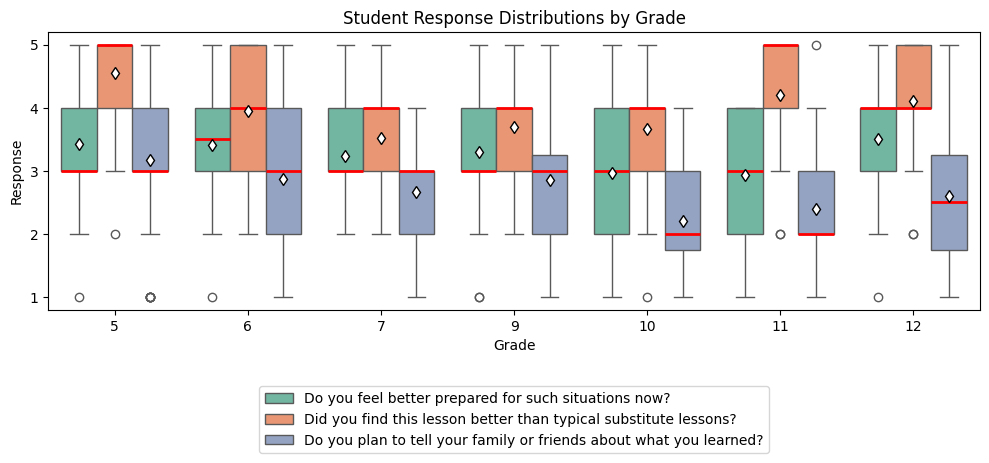

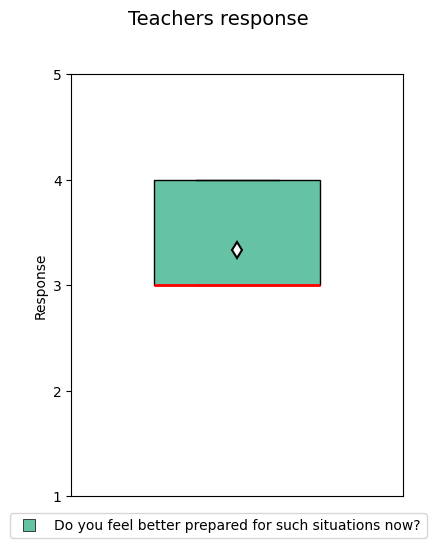

In [5]:
# Boxplot example with customization
x_labels = {'Grade': 'Grade'}
y_labels = {
    'Do you feel better prepared for such situations now?': ('Do you feel better prepared for such situations now?', 0),
    'Did you find this lesson better than typical substitute lessons?': ('Did you find this lesson better than typical substitute lessons?', 1),
    'Do you plan to tell your family or friends about what you learned?': ('Do you plan to tell your family or friends about what you learned?', 2),
}

modules.create_boxplot(
    df_s, 
    title='Student Response Distributions by Grade',
    palette='Set2',
    x_labels=x_labels,
    y_labels=y_labels,
)
y_labels = {
    'Do you feel better prepared for such situations than before?': ('Do you feel better prepared for such situations now?', 0),
}

modules.create_boxplot(
    df_l, 
    title='Teachers response',
    palette='Set2',
    y_labels=y_labels,
)


--------------------------------------------------------------------------------
CORRELATION MATRIX - High Correlations (|r| > 0.7)
--------------------------------------------------------------------------------


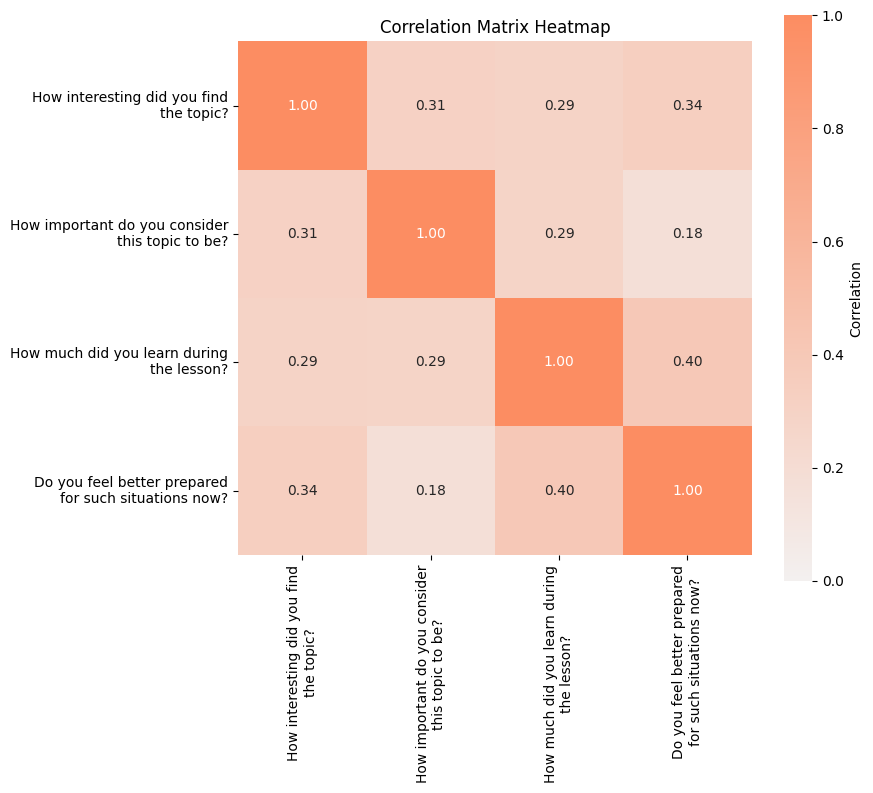

None found - Good! Low multicollinearity ✓

--------------------------------------------------------------------------------
MULTICOLLINEARITY: VARIANCE INFLATION FACTOR (VIF)
--------------------------------------------------------------------------------
VIF > 10: Problematic ✗
VIF 5-10: Concerning ⚠
VIF < 5: Acceptable ✓

                                              Column       VIF        Status
             How interesting did you find the topic? 23.976782 ✗ Problematic
     How important do you consider this topic to be? 23.444950 ✗ Problematic
           How much did you learn during the lesson? 23.142682 ✗ Problematic
Do you feel better prepared for such situations now? 14.318229 ✗ Problematic


In [6]:
# COMPREHENSIVE DATA QUALITY ASSESSMENT
# Test the data quality function with student responses
assessment_items = [
    'How interesting did you find the topic?',
    'How important do you consider this topic to be?',
    'How much did you learn during the lesson?',
    'Do you feel better prepared for such situations now?'
]

modules.assess_data_quality(
    df_j[assessment_items],
    columns=assessment_items,
    show_correlation_heatmap=True
)

In [7]:
# PROPORTIONAL ODDS ASSUMPTION TEST
# Test if the PO assumption holds for our models

print("\n" + "="*80)
print("TESTING PROPORTIONAL ODDS ASSUMPTION FOR ALL MODELS")
print("="*80)

# Test Model 1: Importance → Learning
modules.test_proportional_odds_assumption(df_j, 'How important do you consider this topic to be?', 'How much did you learn during the lesson?')

# Test Model 3: Interest → Learning
modules.test_proportional_odds_assumption(df_j, 'How interesting did you find the topic?', 'How much did you learn during the lesson?')

# Test Model 2: Importance → Preparedness
modules.test_proportional_odds_assumption(df_j, 'How important do you consider this topic to be?', 'Do you feel better prepared for such situations now?')

# Test Model 4: Interest → Preparedness
modules.test_proportional_odds_assumption(df_j, 'How interesting did you find the topic?', 'Do you feel better prepared for such situations now?')




TESTING PROPORTIONAL ODDS ASSUMPTION FOR ALL MODELS

PROPORTIONAL ODDS (PO) ASSUMPTION TEST - Brant Test
Outcome: How much did you learn during the lesson?
Predictor(s): How important do you consider this topic to be?
Sample size: 252

--------------------------------------------------------------------------------
1. ORDINAL LOGISTIC REGRESSION (Constrained - PO Assumption)
--------------------------------------------------------------------------------
Log-Likelihood: -283.3160
AIC: 576.6320
BIC: 594.2792

--------------------------------------------------------------------------------
2. MULTINOMIAL LOGISTIC REGRESSION (Unconstrained - No PO)
--------------------------------------------------------------------------------
Log-Likelihood: -280.2870
AIC: 576.5741
BIC: 604.8095

--------------------------------------------------------------------------------
3. LIKELIHOOD RATIO TEST (Brant Test)
--------------------------------------------------------------------------------
Null Hypo

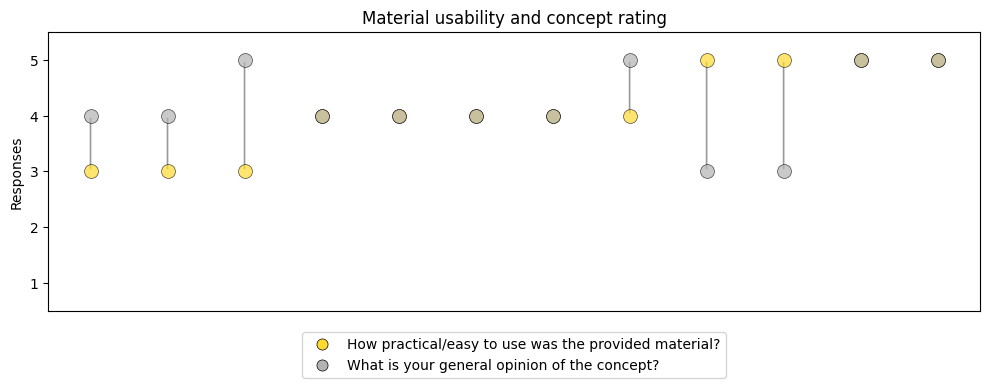

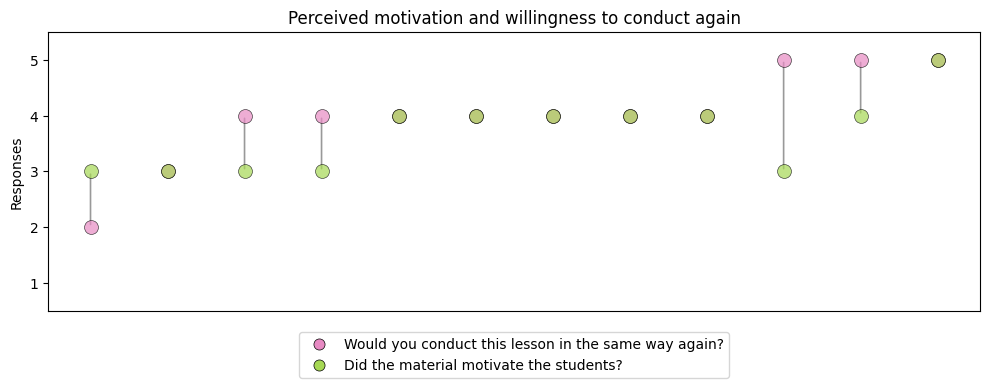

In [8]:
modules.separate_points_plot(
    df_l,
    questions=['How practical/easy to use was the provided material?',  'What is your general opinion of the concept?'],
    title='Material usability and concept rating',
    palette='Set2',
    color_indices=[5, 7]
)

modules.separate_points_plot(
    df_l,
    questions=['Would you conduct this lesson in the same way again?', 'Did the material motivate the students?'],
    title='Perceived motivation and willingness to conduct again',
    palette='Set2',
    color_indices=[3, 4]
)

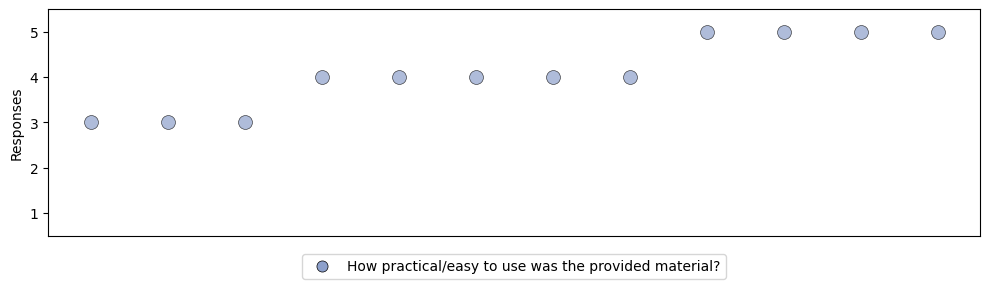

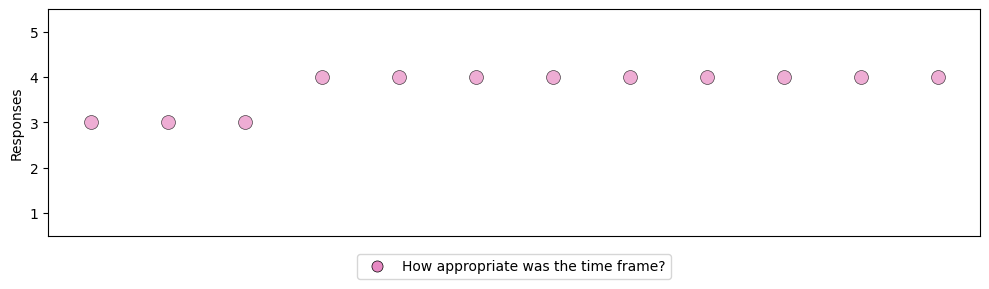

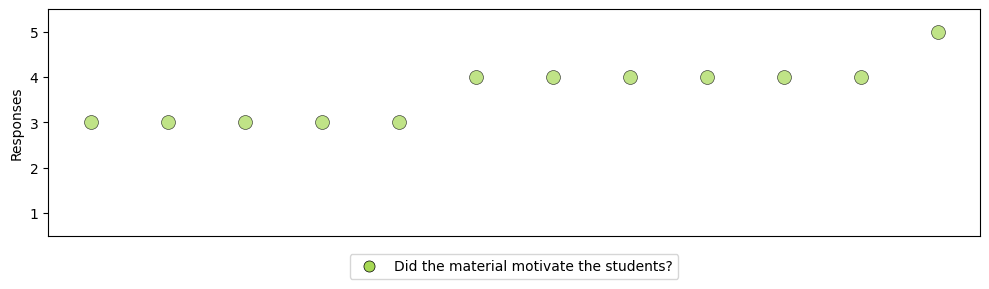

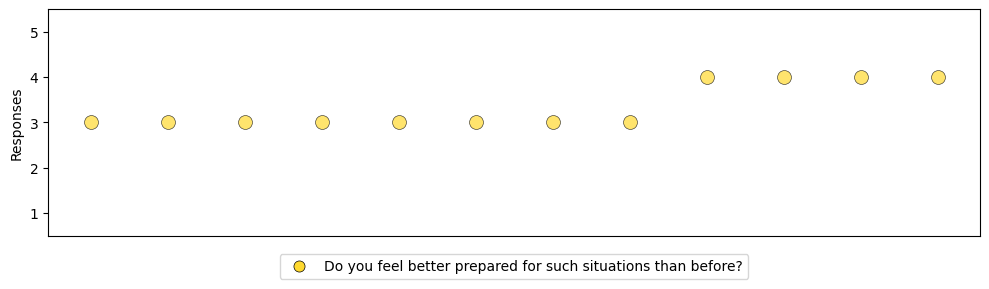

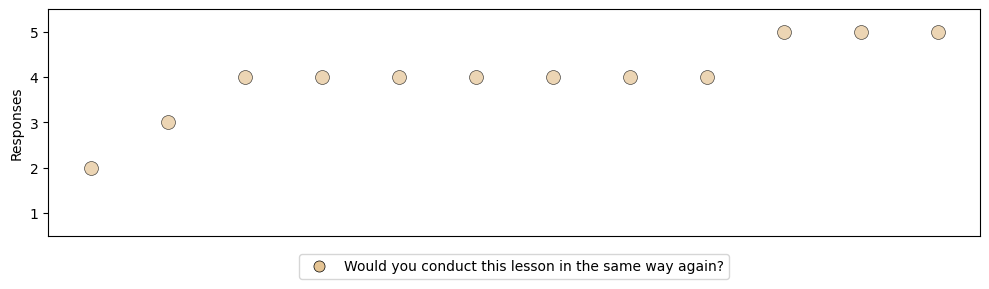

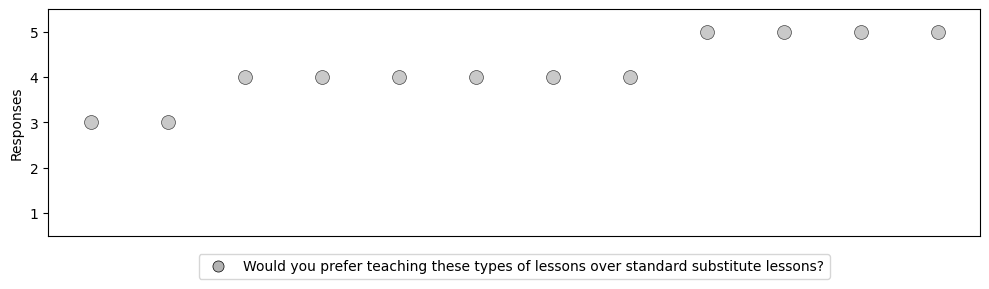

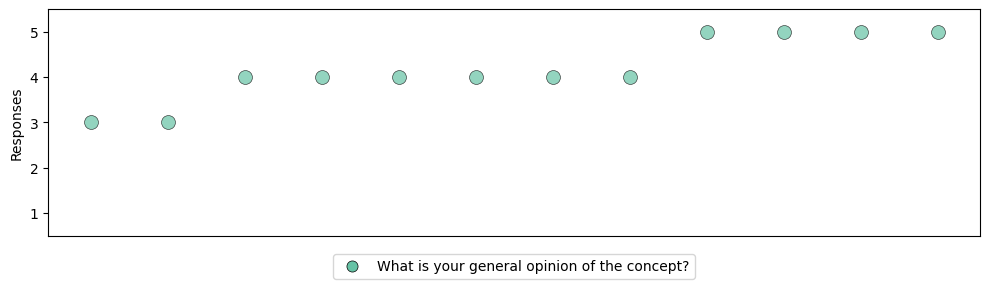

In [9]:
for n, question in enumerate(df_l.columns):
    if question not in ['Grade', 'Topic', 'Grade_Topic']:
        modules.separate_points_plot(
            df_l,
            questions=[question],
            title='',
            palette='Set2',
            color_indices=[n],
            size=(10,3)
        )

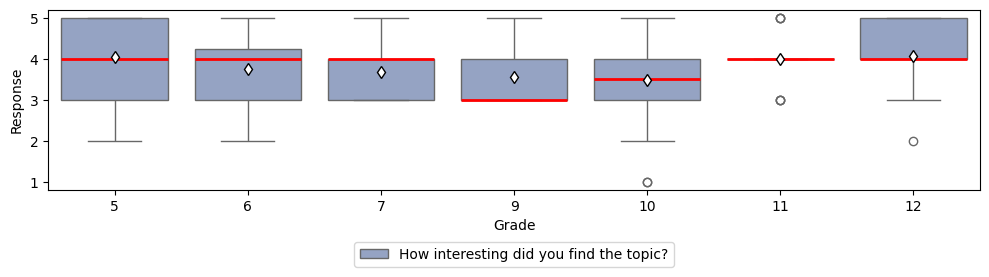

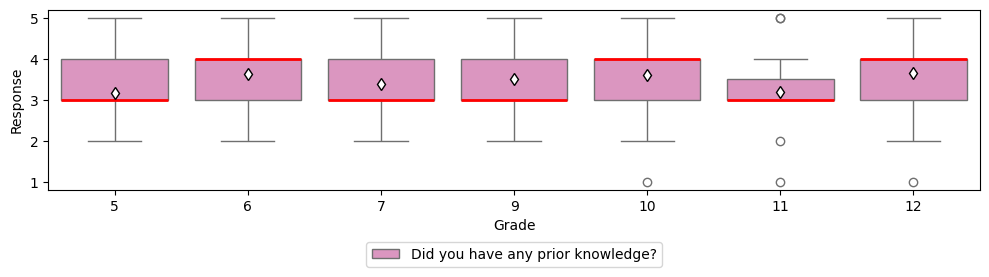

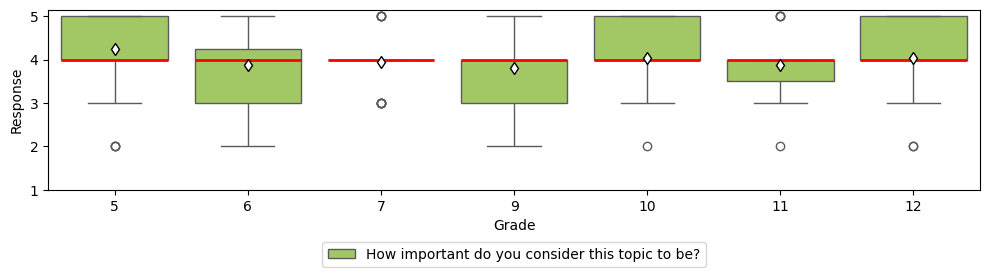

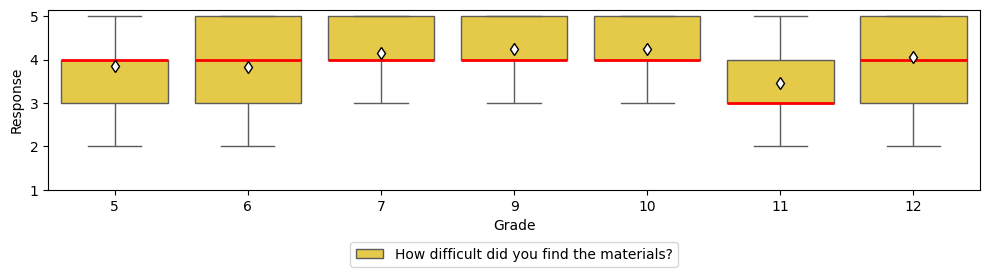

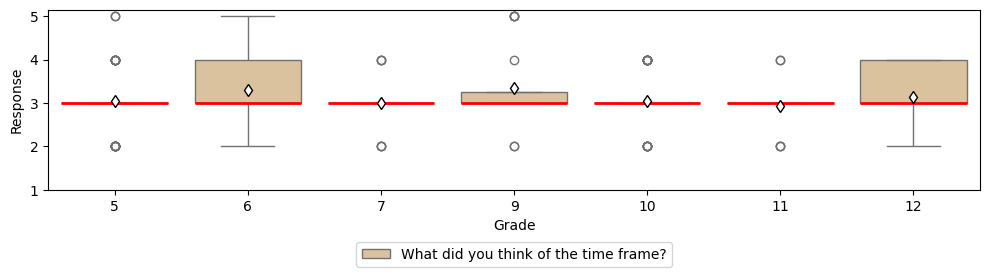

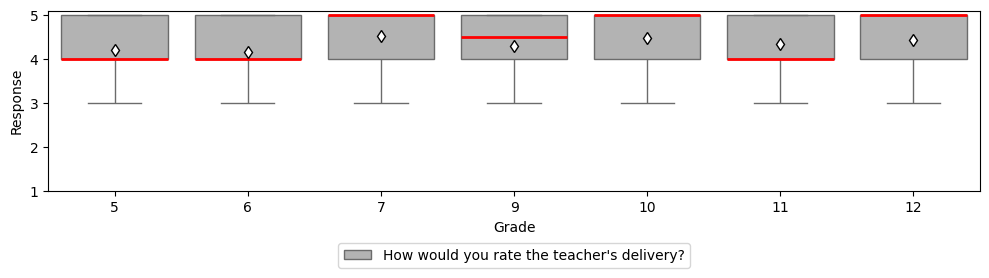

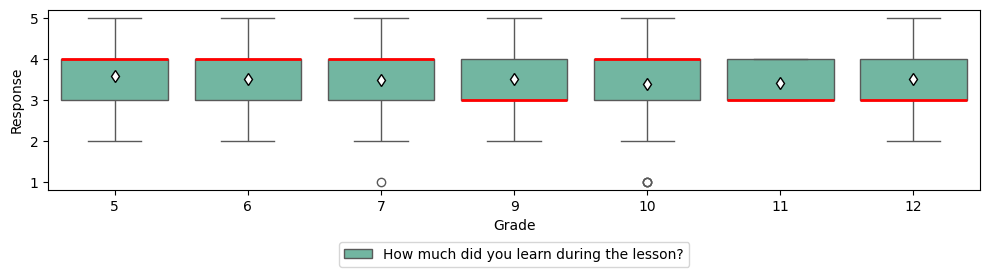

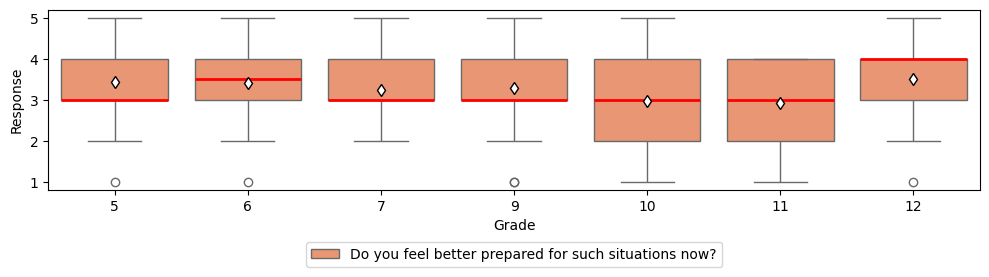

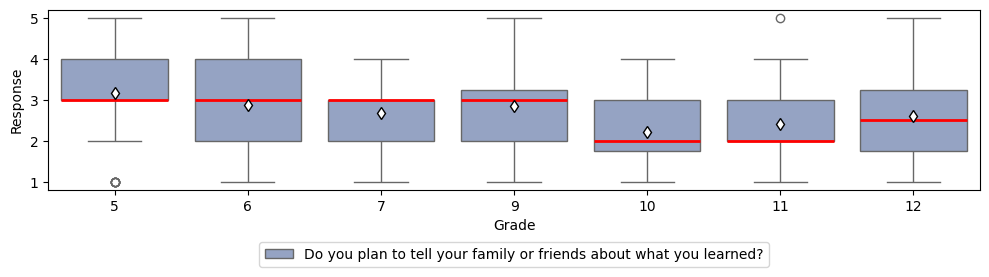

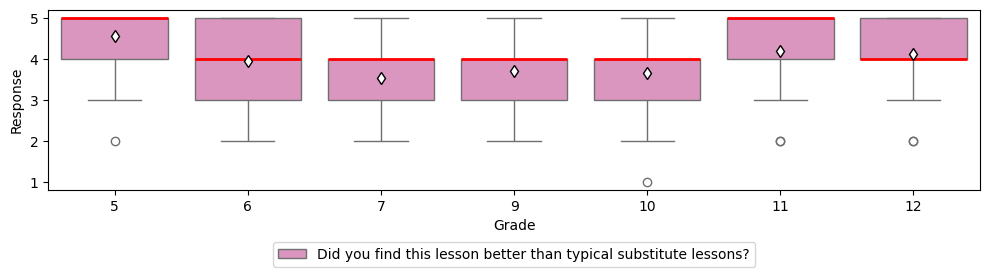

In [10]:
for n,question in enumerate(df_s.columns):
    if question not in ['Grade', 'Topic', 'Grade_Topic']:
        x_labels = {'Grade': 'Grade'}
        y_labels = {
            question: (question, n),
        }

        modules.create_boxplot(
            df_s, 
            title='',
            palette='Set2',
            x_labels=x_labels,
            y_labels=y_labels,
            size=(10,3)
        )